<h1>Mallit: Energiatehokkuuteen vaikuttavia tekijöitä (useamman selittäjän lineaarinen regressio)</h1>

In [1]:
# Tuon kirjastot:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Avaan datan:
df = pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [4]:
# Annetaan sarakkeille nimet:
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation',
              'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


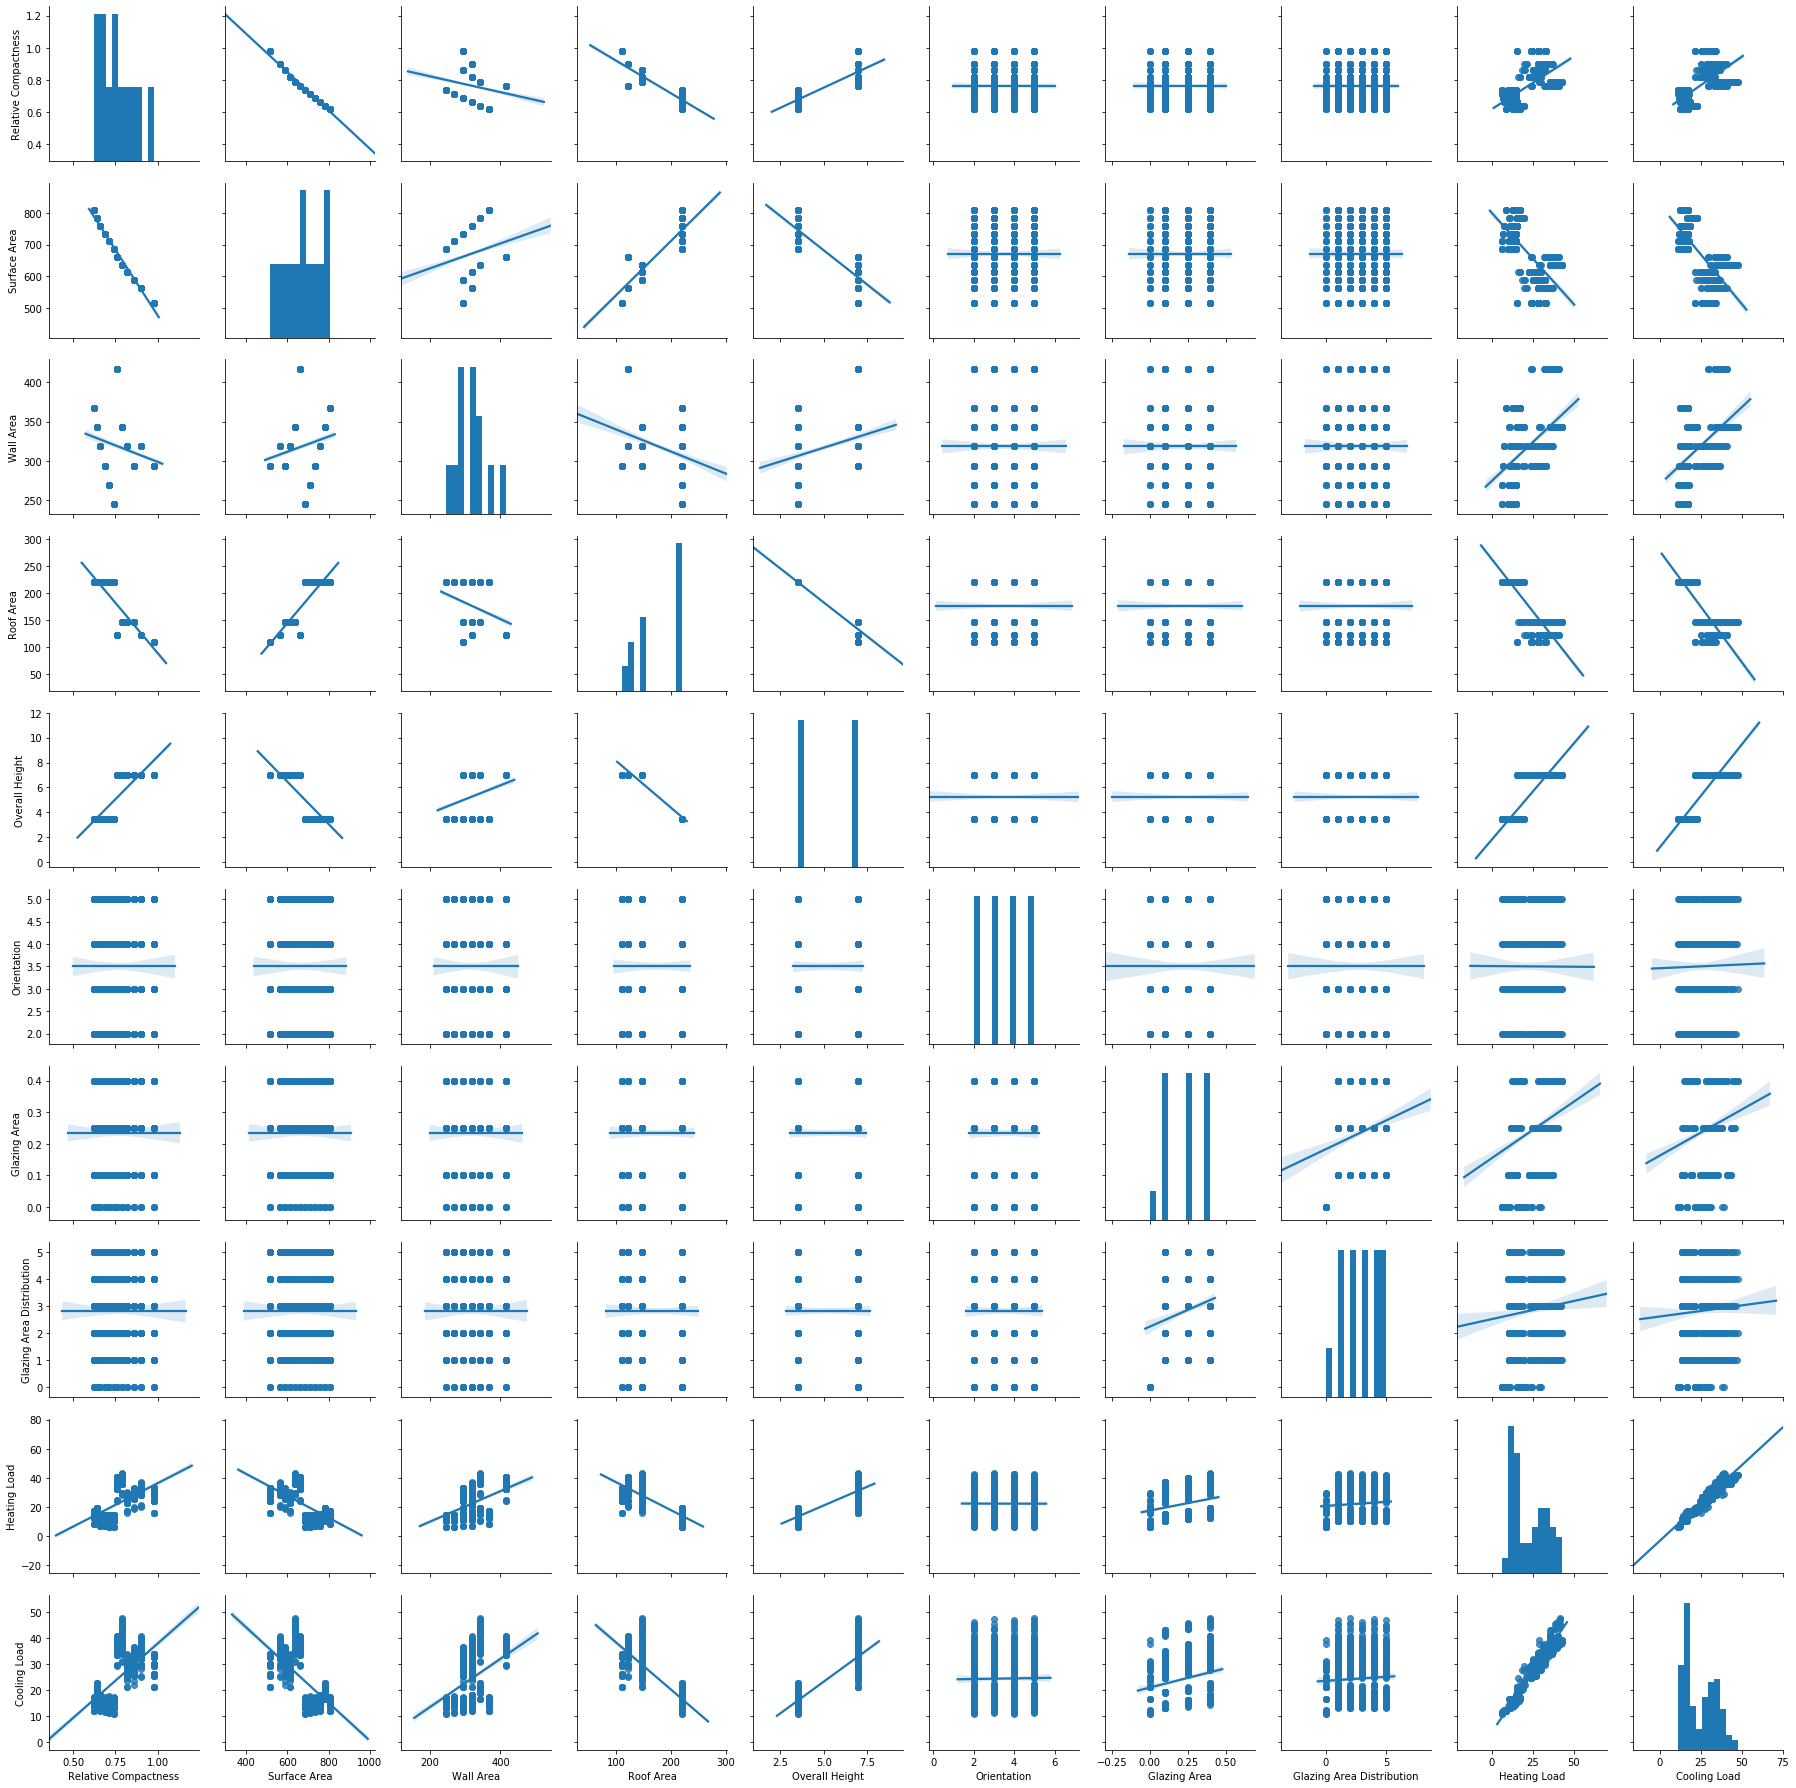

In [5]:
# Riippuvuuksien tarkastelua seaborn-kirjaston hajontakuvioina
sns.pairplot(df, kind='reg')

(10.0, 0.0)

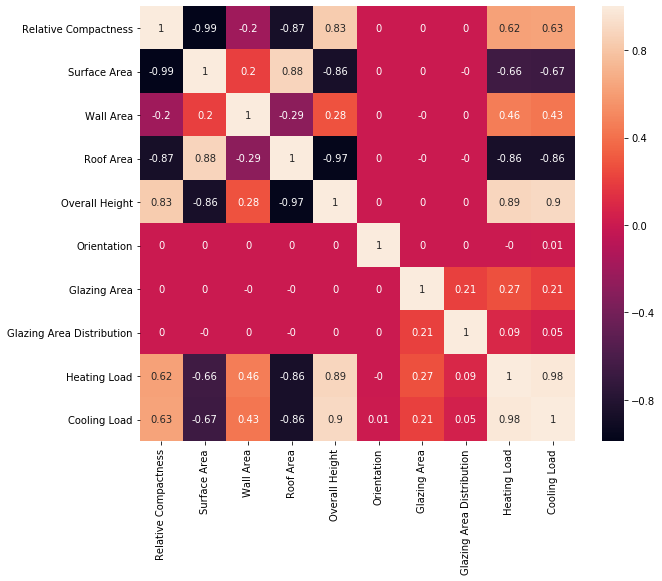

In [6]:
# Riippuvuuksien tarkastelua korrelaatiokertoimien avulla
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, square=True) # Korrelaatioiden taustaväri seaborn-kirjaston heatmap-funktiolla

# Korjataan bugi matplotlib'n versiossa 3.1.1
# https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [7]:
# Datan valmistelu
# feature-matriisi X
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation',
              'Glazing Area', 'Glazing Area Distribution']]
# target eli selitettävä/ennustettava muuttuja
y = df[['Heating Load', 'Cooling Load']]

In [8]:
# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

# Sovitan mallin dataan
malli = LinearRegression().fit(X,y)

In [9]:
malli.coef_ # regressiosuoran kulmakerroin

array([[-6.27346281e+01,  2.59370210e+12, -2.59370210e+12,
        -5.18740419e+12,  4.13950729e+00, -2.61642919e-02,
         1.98963188e+01,  2.01191564e-01],
       [-6.92967224e+01,  1.89678379e+12, -1.89678379e+12,
        -3.79356758e+12,  4.26114845e+00,  1.19301849e-01,
         1.46904106e+01,  3.94123298e-02]])

In [10]:
malli.intercept_ # regressiosuoran vakiotermi

array([82.06230606, 95.8702624 ])

In [11]:
malli.score(X,y) # selityskerroin

C:\Users\Henri\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9025198629889027

Text(0, 0.5, 'Poikkeama todellisesta')

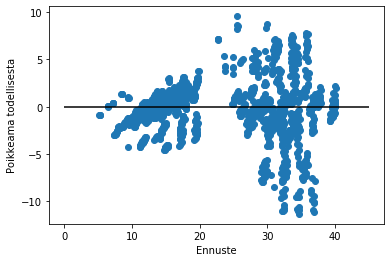

In [12]:
# Mallin virhetermit pistekuviona
plt.scatter(malli.predict(X), malli.predict(X)-y)

# Vaakaviiva nollapoikkeaman kohdalle
plt.hlines(y=0,xmin=0,xmax=45)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

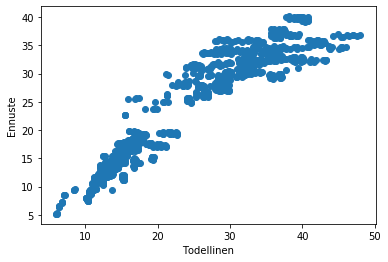

In [13]:
# Todellisen ja mallin antamien ennusteiden vastaavuus pistekuviona
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen')
plt.ylabel('Ennuste')